In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import sklearn
import tensorflow as tf
from tensorflow import keras

In [2]:
"""
引入训练集和测试集
"""
fashion_mnist = keras.datasets.fashion_mnist
(x_train_all, y_train_all), (x_test, y_test) = fashion_mnist.load_data()
x_valid, x_train = x_train_all[:5000], x_train_all[5000:]
y_valid, y_train = y_train_all[:5000], y_train_all[5000:]

print(x_valid.shape, y_valid.shape)
print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

(5000, 28, 28) (5000,)
(55000, 28, 28) (55000,)
(10000, 28, 28) (10000,)


In [3]:
"""
特征标准化
"""
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train.astype(np.float32).reshape(-1, 1)).reshape(-1, 28, 28)
x_valid_scaled = scaler.transform(x_valid.astype(np.float32).reshape(-1, 1)).reshape(-1, 28, 28)
x_test_scaled = scaler.transform(x_test.astype(np.float32).reshape(-1, 1)).reshape(-1, 28, 28)

In [10]:
"""
构建模型基本线，包含一个Flatten操作和三个全连接层。
每个图像有784个特征，我们先把它们输出为300个特征，在输出为100个特征，最后输出结果
"""
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, activation='relu'),
    keras.layers.Dense(100, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

In [5]:
"""
构建损失函数，优化器和评估指标
"""
model.compile(loss="sparse_categorical_crossentropy",
              optimizer = keras.optimizers.SGD(0.001),
              metrics = ["accuracy"])

In [6]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 300)               235500    
                                                                 
 dense_1 (Dense)             (None, 100)               30100     
                                                                 
 dense_2 (Dense)             (None, 10)                1010      
                                                                 
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


In [7]:
"""
callbacks是我还不太理解的
"""
callbacks = [
    keras.callbacks.TensorBoard(logdir),
    keras.callbacks.ModelCheckpoint(output_model_file,save_best_only = True),
    keras.callbacks.EarlyStopping(patience=5, min_delta=1e-3),
]
"""
模型训练
"""
history = model.fit(x_train, y_train, epochs=30, validation_data=(x_valid, y_valid),callbacks=callbacks)

Epoch 1/30
1719/1719 [==============================] - 3s 1ms/step - loss: 3.0122 - accuracy: 0.6844 - val_loss: 0.7160 - val_accuracy: 0.7462
Epoch 2/30
1719/1719 [==============================] - 2s 1ms/step - loss: 0.5937 - accuracy: 0.7851 - val_loss: 0.5597 - val_accuracy: 0.8004
Epoch 3/30
1719/1719 [==============================] - 2s 1ms/step - loss: 0.5040 - accuracy: 0.8161 - val_loss: 0.5148 - val_accuracy: 0.8244
Epoch 4/30
1719/1719 [==============================] - 2s 1ms/step - loss: 0.4612 - accuracy: 0.8292 - val_loss: 0.4889 - val_accuracy: 0.8286
Epoch 5/30
1719/1719 [==============================] - 2s 1ms/step - loss: 0.4331 - accuracy: 0.8373 - val_loss: 0.4801 - val_accuracy: 0.8340
Epoch 6/30
1719/1719 [==============================] - 2s 1ms/step - loss: 0.4137 - accuracy: 0.8445 - val_loss: 0.4815 - val_accuracy: 0.8382
Epoch 7/30
1719/1719 [==============================] - 2s 1ms/step - loss: 0.3987 - accuracy: 0.8492 - val_loss: 0.4470 - val_accuracy:

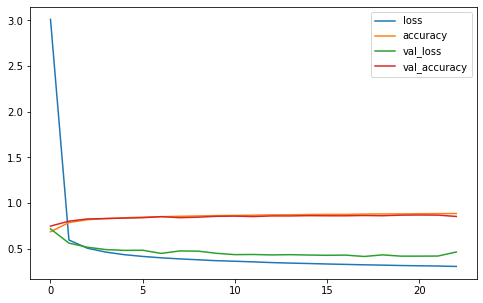

In [15]:
"""
看看训练集的损失值和准确率以及验证集的损失值和准确率的变化
"""
test = pd.DataFrame(history.history)
test.plot(figsize=(8,5))
plt.show()